In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
from datetime import datetime

# 1.Data Collection

In [3]:
now = datetime.now()
start = datetime(now.year-10, now.month, now.day)
end = now
ticker = 'AAPL' # apple ticker
df = yf.download(ticker,start,end,auto_adjust=False) # we are collecting data from now to past 10 years
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-11-24,26.803749,29.719999,29.837500,29.280001,29.332500,171212800
2015-11-25,26.612099,29.507500,29.807501,29.480000,29.802500,85553200
2015-11-27,26.562494,29.452499,29.602501,29.400000,29.572500,52185600
2015-11-30,26.672974,29.575001,29.852501,29.437500,29.497499,156721200
2015-12-01,26.456522,29.334999,29.702499,29.215000,29.687500,139409600
...,...,...,...,...,...,...
2025-11-18,267.440002,267.440002,270.709991,265.320007,269.989990,45677300
2025-11-19,268.559998,268.559998,272.209991,265.500000,265.529999,40424500


# 2.Data Exploration & Visualization

In [4]:
df.isna().sum()

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

In [41]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,111.564567,113.830145,114.966095,112.581271,113.723106,1.030278e+08
std,71.948995,71.570596,72.267687,70.799122,71.497409,5.829433e+07
min,20.604074,22.584999,22.917500,22.367500,22.500000,2.323470e+07
25%,40.985916,43.577499,43.799999,43.240000,43.551250,6.313855e+07
50%,117.468239,120.589996,121.989998,118.919998,120.360001,8.990850e+07
75%,170.664818,172.834999,174.080002,170.985001,172.445000,1.262672e+08
max,275.250000,275.250000,277.320007,272.089996,276.989990,5.334788e+08


In [42]:
df.dtypes

Price      Ticker
Adj Close  AAPL      float64
Close      AAPL      float64
High       AAPL      float64
Low        AAPL      float64
Open       AAPL      float64
Volume     AAPL        int64
dtype: object

In [17]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-11-19,26.781200,29.695000,29.937500,29.190001,29.410000,173183200
2015-11-20,26.898445,29.825001,29.980000,29.712500,29.799999,137148400
2015-11-23,26.548967,29.437500,29.932501,29.334999,29.817499,129930000
2015-11-24,26.803751,29.719999,29.837500,29.280001,29.332500,171212800
2015-11-25,26.612093,29.507500,29.807501,29.480000,29.802500,85553200


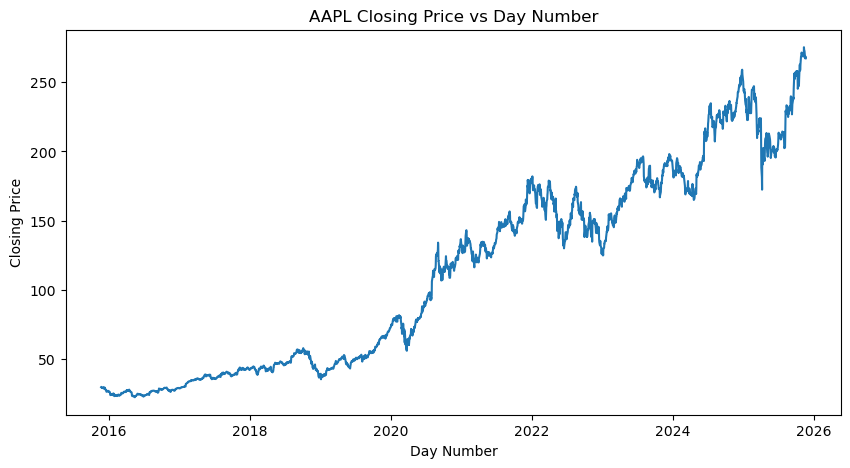

In [43]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.xlabel("Day Number")
plt.ylabel("Closing Price")
plt.title("AAPL Closing Price vs Day Number")
plt.show()

# 3.Feature Engineering

In [24]:
# MA-->moving average gives the avergare form this to prev ndays average ..if we calculating for n days

In [6]:
df1 = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [7]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


#### 100 Days MA

In [8]:
df['MA_100'] = df['Close'].rolling(window=100).mean()
df

Price,Adj Close,Close,High,Low,Open,Volume,MA_100
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,,
2015-11-24,26.803749,29.719999,29.837500,29.280001,29.332500,171212800,NaN
2015-11-25,26.612099,29.507500,29.807501,29.480000,29.802500,85553200,NaN
2015-11-27,26.562494,29.452499,29.602501,29.400000,29.572500,52185600,NaN
2015-11-30,26.672974,29.575001,29.852501,29.437500,29.497499,156721200,NaN
2015-12-01,26.456522,29.334999,29.702499,29.215000,29.687500,139409600,NaN
...,...,...,...,...,...,...,...
2025-11-18,267.440002,267.440002,270.709991,265.320007,269.989990,45677300,238.498200
2025-11-19,268.559998,268.559998,272.209991,265.500000,265.529999,40424500,239.132100


Text(0.5, 1.0, 'AAPL Closing Price vs Day Number Moving Average')

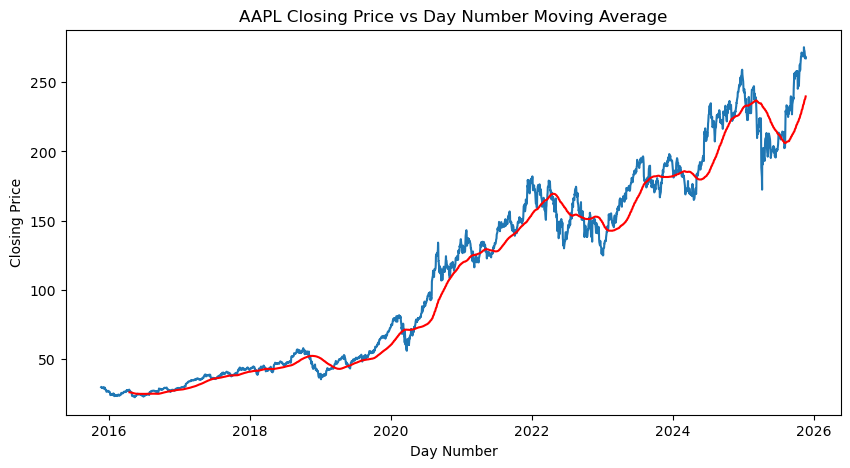

In [45]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.plot(df['MA_100'],'r')
plt.xlabel("Day Number")
plt.ylabel("Closing Price")
plt.title("AAPL Closing Price vs Day Number Moving Average")


#### 200 Days MA

In [9]:
df['200_MA'] = df['Close'].rolling(window=200).mean()
df

Price,Adj Close,Close,High,Low,Open,Volume,MA_100,200_MA
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,,
2015-11-24,26.803749,29.719999,29.837500,29.280001,29.332500,171212800,NaN,NaN
2015-11-25,26.612099,29.507500,29.807501,29.480000,29.802500,85553200,NaN,NaN
2015-11-27,26.562494,29.452499,29.602501,29.400000,29.572500,52185600,NaN,NaN
2015-11-30,26.672974,29.575001,29.852501,29.437500,29.497499,156721200,NaN,NaN
2015-12-01,26.456522,29.334999,29.702499,29.215000,29.687500,139409600,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-11-18,267.440002,267.440002,270.709991,265.320007,269.989990,45677300,238.498200,225.73025
2025-11-19,268.559998,268.559998,272.209991,265.500000,265.529999,40424500,239.132100,225.90905


Text(0.5, 1.0, 'AAPL Closing Price vs Day Number Moving Average')

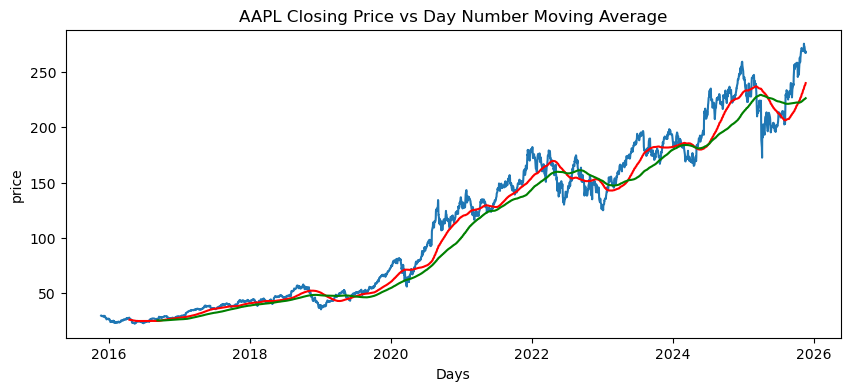

In [47]:
plt.figure(figsize=(10,4))
plt.plot(df['Close'])
plt.plot(df['MA_100'],'r')
plt.plot(df['200_MA'],'g')
plt.xlabel("Days")
plt.ylabel("price")
plt.title("AAPL Closing Price vs Day Number Moving Average")

### Calculating % changes in each trading session

In [10]:
df['percentage_change'] = df.Close.pct_change()
df[['Close','percentage_change']]

Price,Close,percentage_change
Ticker,AAPL,
Date,,
2015-11-24,29.719999,NaN
2015-11-25,29.507500,-0.007150
2015-11-27,29.452499,-0.001864
2015-11-30,29.575001,0.004159
2015-12-01,29.334999,-0.008115
...,...,...
2025-11-18,267.440002,-0.000075
2025-11-19,268.559998,0.004188


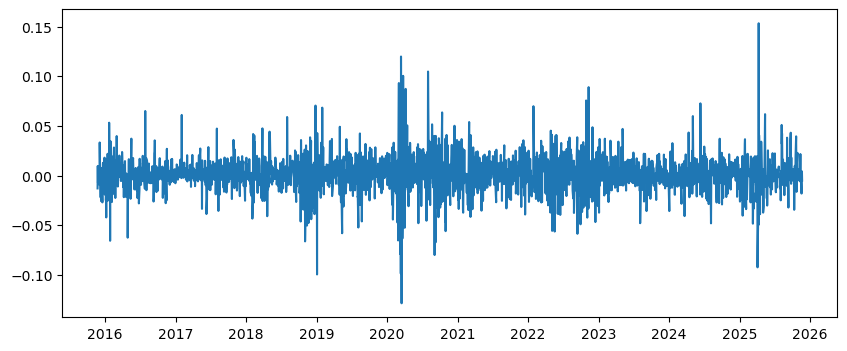

In [49]:
plt.figure(figsize=(10,4))
plt.plot(df.percentage_change)

# 4.Data Preprocessing

In [11]:
# in this we will spit data in 2 parts testing data ,traning data
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])
print(data_testing)

Ticker            AAPL
Date                  
2022-11-21  148.009995
2022-11-22  150.179993
2022-11-23  151.070007
2022-11-25  148.110001
2022-11-28  144.220001
...                ...
2025-11-18  267.440002
2025-11-19  268.559998
2025-11-20  266.250000
2025-11-21  271.489990
2025-11-24  274.760101

[755 rows x 1 columns]


In [12]:
# Scaling the data between 0 to 1.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
data_training_array = scaler.fit_transform(data_training)
len(data_training_array)

1760

 # 5. Sequence Creation

In [14]:
x_train=[]
y_train=[]

for i in range(100,len(data_training_array)):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
x_train.ndim

3

In [16]:
y_train.ndim

1

# 6.Model Building

In [17]:
import tensorflow as tf


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

In [23]:
model = Sequential()

model.add(Input(shape=(100,1)))
model.add(LSTM(units=(128), activation='tanh', return_sequences=True))
model.add(LSTM(units=(64)))
model.add(Dense(25))
model.add(Dense(1))

# 7.Model Training

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 245ms/step - loss: 0.0103
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step - loss: 6.5265e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 307ms/step - loss: 6.2967e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 258ms/step - loss: 6.1396e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 236ms/step - loss: 6.0334e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 259ms/step - loss: 5.6794e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 253ms/step - loss: 6.1629e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step - loss: 5.6004e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - loss: 4.5723e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step - loss: 4.6762e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 205ms/step - loss: 4.4274e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 301ms/step - loss: 4.7102e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 285ms/step - loss: 5.0378e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 282ms/step - loss: 4.

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [26]:
model.save('stock_prediction_model.keras')

# 8.Prepare test data

In [42]:
past_100_days_data = data_training.tail(100)
past_100_days_data

Ticker,AAPL
Date,
2022-06-30,136.720001
2022-07-01,138.929993
2022-07-05,141.559998
2022-07-06,142.919998
2022-07-07,146.350006
...,...
2022-11-14,148.279999
2022-11-15,150.039993
2022-11-16,148.789993


In [43]:
final_df = pd.concat([past_100_days_data, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,136.720001
1,138.929993
2,141.559998
3,142.919998
4,146.350006
...,...
850,267.440002
851,268.559998
852,266.250000
853,271.489990


In [44]:
input_data = scaler.fit_transform(final_df)
input_data

array([[7.78806118e-02],
       [9.25913314e-02],
       [1.10097854e-01],
       [1.19150643e-01],
       [1.41982354e-01],
       [1.46575226e-01],
       [1.32130720e-01],
       [1.38720652e-01],
       [1.36257794e-01],
       [1.56094016e-01],
       [1.67409978e-01],
       [1.46775013e-01],
       [1.72934852e-01],
       [1.86513985e-01],
       [2.01890493e-01],
       [1.93503289e-01],
       [1.85914928e-01],
       [1.76928768e-01],
       [2.11475710e-01],
       [2.15203413e-01],
       [2.49550669e-01],
       [2.42894209e-01],
       [2.32909519e-01],
       [2.73647123e-01],
       [2.71517007e-01],
       [2.68455093e-01],
       [2.65259919e-01],
       [2.65592762e-01],
       [2.94348718e-01],
       [2.89356373e-01],
       [3.13386197e-01],
       [3.20641714e-01],
       [3.19576656e-01],
       [3.29694504e-01],
       [3.27031859e-01],
       [3.09525438e-01],
       [2.83232442e-01],
       [2.80969168e-01],
       [2.82966127e-01],
       [2.99607276e-01],


In [45]:
x_test = []
y_test = []

for i in range(100, len(input_data)):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])


In [46]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [47]:
x_test

array([[[0.07788061],
        [0.09259133],
        [0.11009785],
        ...,
        [0.15822403],
        [0.17107105],
        [0.17486518]],

       [[0.09259133],
        [0.11009785],
        [0.11915064],
        ...,
        [0.17107105],
        [0.17486518],
        [0.153032  ]],

       [[0.11009785],
        [0.11915064],
        [0.14198235],
        ...,
        [0.17486518],
        [0.153032  ],
        [0.16747651]],

       ...,

       [[0.55115495],
        [0.58190777],
        [0.58929644],
        ...,
        [0.94814612],
        [0.94801306],
        [0.95546827]],

       [[0.58190777],
        [0.58929644],
        [0.56533315],
        ...,
        [0.94801306],
        [0.95546827],
        [0.94009186]],

       [[0.58929644],
        [0.56533315],
        [0.56573252],
        ...,
        [0.95546827],
        [0.94009186],
        [0.97497165]]], shape=(755, 100, 1))

In [33]:
y_test

array([1.53032000e-01, 1.67476506e-01, 1.73400853e-01, 1.53697687e-01,
       1.27804061e-01, 1.07501838e-01, 1.53165158e-01, 1.55028958e-01,
       1.51700728e-01, 1.43846154e-01, 1.19084115e-01, 1.05970881e-01,
       1.17353371e-01, 1.14091770e-01, 1.29601334e-01, 1.36124636e-01,
       1.21081073e-01, 7.64161825e-02, 6.31697907e-02, 4.89249704e-02,
       4.84590711e-02, 6.94268793e-02, 4.79930701e-02, 4.55302124e-02,
       3.33488785e-02, 6.78961758e-03, 3.05531776e-02, 3.26831919e-02,
       3.32843311e-04, 8.91968274e-03, 0.00000000e+00, 3.06197056e-02,
       3.41476212e-02, 3.80083802e-02, 5.63802747e-02, 5.58477457e-02,
       6.48339057e-02, 7.26885812e-02, 6.78293939e-02, 6.82287652e-02,
       8.55355001e-02, 1.07102467e-01, 1.16554628e-01, 1.12094812e-01,
       1.26073418e-01, 1.39186551e-01, 1.19683172e-01, 1.28269961e-01,
       1.35858321e-01, 1.71736738e-01, 1.96232462e-01, 1.77794039e-01,
       1.97230890e-01, 1.79058783e-01, 1.72069479e-01, 1.73001380e-01,
      

# 9.Making Predictions

In [48]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step


In [49]:
y_predicted

array([[0.17592426],
       [0.17094469],
       [0.17042577],
       [0.1732838 ],
       [0.16917379],
       [0.15593633],
       [0.13823752],
       [0.14042258],
       [0.14795755],
       [0.15352021],
       [0.15404344],
       [0.1446278 ],
       [0.13140276],
       [0.12512097],
       [0.12164285],
       [0.12515609],
       [0.13169524],
       [0.13198929],
       [0.1159894 ],
       [0.09670756],
       [0.07819591],
       [0.06535093],
       [0.06409629],
       [0.06050782],
       [0.05649329],
       [0.04998586],
       [0.03706983],
       [0.03230544],
       [0.03211311],
       [0.02444886],
       [0.01871184],
       [0.01281405],
       [0.01665056],
       [0.02381813],
       [0.03111849],
       [0.04162066],
       [0.05007561],
       [0.05801215],
       [0.06581179],
       [0.06980544],
       [0.07155071],
       [0.0773532 ],
       [0.08940213],
       [0.10278416],
       [0.11101304],
       [0.11970196],
       [0.1301008 ],
       [0.131

In [50]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()


In [51]:
y_test

array([148.00999451, 150.17999268, 151.07000732, 148.11000061,
       144.22000122, 141.16999817, 148.02999878, 148.30999756,
       147.80999756, 146.63000488, 142.91000366, 140.94000244,
       142.6499939 , 142.16000366, 144.49000549, 145.47000122,
       143.21000671, 136.5       , 134.50999451, 132.36999512,
       132.30000305, 135.44999695, 132.22999573, 131.86000061,
       130.02999878, 126.04000092, 129.61000061, 129.92999268,
       125.06999969, 126.36000061, 125.01999664, 129.61999512,
       130.1499939 , 130.72999573, 133.49000549, 133.41000366,
       134.75999451, 135.94000244, 135.21000671, 135.27000427,
       137.86999512, 141.11000061, 142.52999878, 141.86000061,
       143.96000671, 145.92999268, 143.        , 144.28999329,
       145.42999268, 150.82000732, 154.5       , 151.72999573,
       154.6499939 , 151.91999817, 150.86999512, 151.00999451,
       153.8500061 , 153.19999695, 155.33000183, 153.71000671,
       152.55000305, 148.47999573, 148.91000366, 149.39

In [52]:
y_predicted

array([151.4491  , 150.70102 , 150.62306 , 151.05243 , 150.43497 ,
       148.44632 , 145.78741 , 146.11568 , 147.24767 , 148.08334 ,
       148.16194 , 146.74744 , 144.76064 , 143.81693 , 143.2944  ,
       143.82219 , 144.80458 , 144.84874 , 142.44508 , 139.54837 ,
       136.76736 , 134.83766 , 134.64919 , 134.11009 , 133.50699 ,
       132.52937 , 130.589   , 129.87325 , 129.84435 , 128.69295 ,
       127.83108 , 126.94505 , 127.521416, 128.59819 , 129.69493 ,
       131.27266 , 132.54286 , 133.73517 , 134.9069  , 135.50687 ,
       135.76906 , 136.64078 , 138.45088 , 140.46126 , 141.69748 ,
       143.00282 , 144.56505 , 144.71942 , 144.86844 , 145.3452  ,
       147.59717 , 150.91846 , 152.41443 , 153.97655 , 153.97668 ,
       153.20804 , 152.56403 , 153.20193 , 153.71379 , 154.81969 ,
       155.08685 , 154.63593 , 152.69827 , 151.2459  , 150.57825 ,
       149.4129  , 148.95322 , 148.65422 , 147.78714 , 147.26706 ,
       148.75575 , 151.28632 , 152.43584 , 153.2774  , 152.889

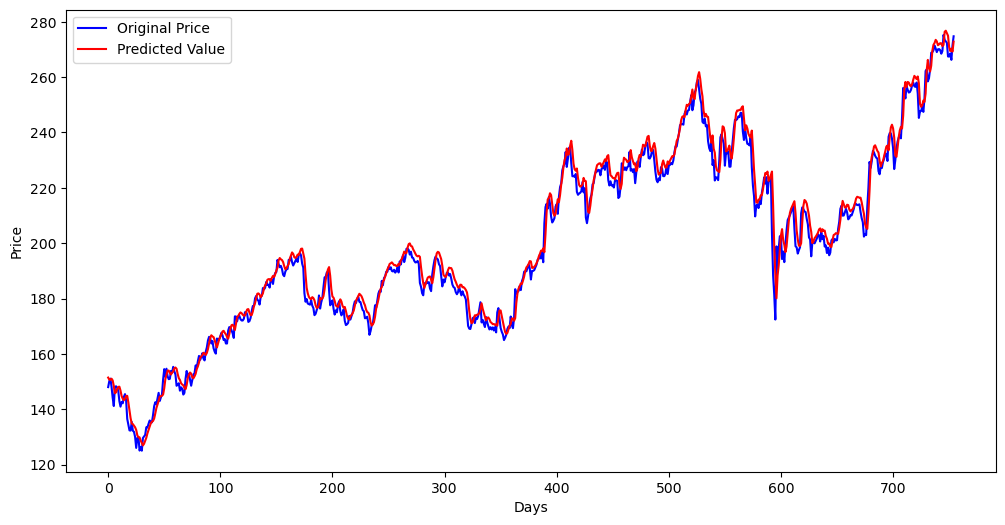

In [53]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='Original Price')
plt.plot(y_predicted,'r', label='Predicted Value')
plt.xlabel("Days")
plt.ylabel('Price')
plt.legend()

(160.0, 280.0)

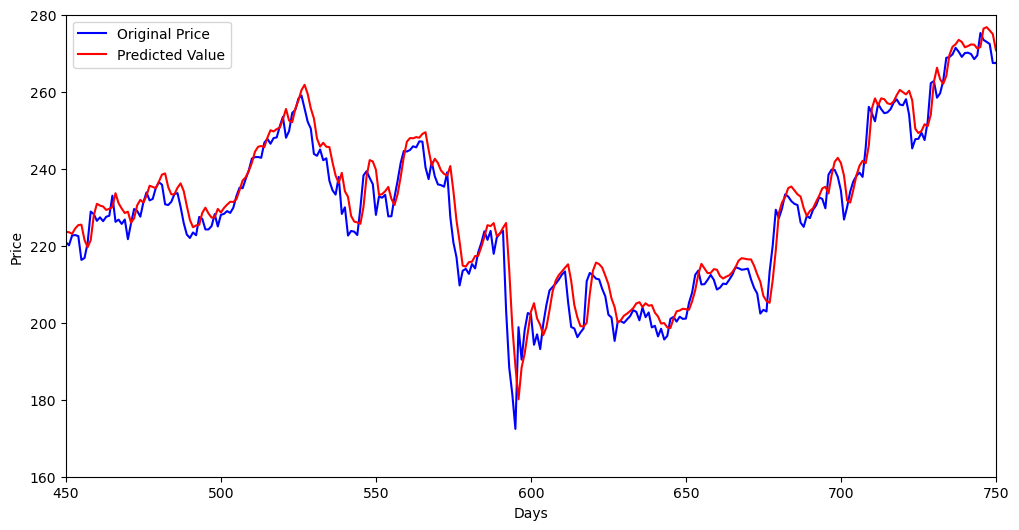

In [54]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='Original Price')
plt.plot(y_predicted,'r', label='Predicted Value')
plt.xlabel("Days")
plt.ylabel('Price')
plt.legend()
plt.xlim(450,750)
plt.ylim(160,280)

# 10. Model Evaluation

In [55]:
# MSE(mean squared error)
from sklearn.metrics import mean_squared_error,  r2_score

In [56]:
mse = mean_squared_error(y_test, y_predicted)
print("Mean suared error(MSE):",mse)

Mean suared error(MSE): 17.606053623717372


In [57]:
# root mean suared error(RMSE)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

RMSE : 4.1959568186192495


In [58]:
# R-squared
r2 = r2_score(y_test, y_predicted)
print("r2:",r2)

r2: 0.9839486596591147
